In [1]:
from Data_Processing import *
from xgboost import plot_importance
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score

C:\Users\utktripa1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cat = ["JobRole", "EducationField", "Gender", "MaritalStatus", "BusinessTravel", "Department", "OverTime", \
           "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "StockOptionLevel", "Attrition"]

In [3]:
# Function reads the Data, removes unwanted columns
def read_data(wkdir, name):
    set_wd(wkdir)
    df = pd.read_csv(name, index_col= False)
    df.drop("EmployeeNumber", axis=1, inplace= True)
    df.drop("PerformanceRating", axis= 1, inplace= True)
    df = del_zero_var_cols(df)
    return df

In [4]:
# Prcocessing and Cleaning Occurs here
def process_data(data):
    data = new_features(data)
    data = conv_categories(data)
    data = gen_dummies(data)
    return data

In [5]:
#Cross validation happens here
def cross_val_cal(fold, X, y):
    model = model_train_fit(X,y, do_fit= False)
    print(np.mean(cross_val_score(model, X, y, cv = fold, scoring= "roc_auc")))

In [7]:
# Model in trained and model object is returned
def model_train_fit(X,y,depth = 6, l_r = 0.001, trees = 1000, sample = 0.9, do_fit = True):
    xgb = XGBClassifier(max_depth= depth, learning_rate= l_r, n_estimators= trees, subsample= sample)
    if do_fit == True:
        xgb.fit(X, y)
    return xgb

In [8]:
# Prediction on Test Data
def predict_data(model, X_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    return y_pred, y_prob

In [9]:
# Calcualte Accuracy, ROC_AUC, Precision, Recall, F1-Score
def metrics_calc(y_act, y_pred):
    print(accuracy_score(y_act, y_pred))
    print(roc_auc_score(y_act, y_pred))
    print(classification_report(y_act, y_pred))

In [10]:
# Plotting the ROC Curve
def roc_plot(y_act, y_prob):
    
    plt.figure()
    fig_size = plt.rcParams["figure.figsize"] 
    fig_size[0] = 15
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:grey')
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_act, y_prob)
    
    # Now, plot the computed values
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot(fpr, tpr)
    plt.title("ROC CURVE")
    
    # Custom settings for the plot 
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
# Pandas Series with Importance of each variable
def feature_importance(model, data, train):
    imp = pd.Series(model.feature_importances_, index= data[train].columns).sort_values(ascending = False)
    print(imp)
    return imp

In [12]:
# # Dump Model to Pickle
# Pickle is a Python libraries which is the best choice to perform the task like
# - Pickling  the process converting any Python object into a stream of bytes by following the hierarchy of the object we are trying to convert. 
# - Unpickling the process of converting the pickled (stream of bytes) back into to the original Python object by following the object hierarchy
def pickling(model, name):
    model_pkl = open(name, 'wb')
    pickle.dump(model, model_pkl)
    model_pkl.close()

In [13]:
def model_load(name):
    model_pkl = open(name, 'rb')
    model = pickle.load(model_pkl)
    print("Loaded model :: ", model)
    return model

In [15]:
# # Set working directory
wd = "C:\\Users\\utktripa1\\Desktop\\howathon\\" # This should de done manually
# Call Read Data function
df = read_data(wd, "attrition.csv") # File name should be given manually
# Call Process Data Function
df = process_data(df)
# Removing the Target variable and storing ather column names
X = list(df.drop("Attrition_new", axis=1).columns)
y = "Attrition_new"
# Splitting the Data
X_train, X_test, y_train, y_test = train_test(df,X,y, 0.2)

C:\Users\utktripa1\Desktop\howathon


In [16]:
# Performing Cross Validation
cross_val_cal(5, df[X], df[y])

0.7588900222493482


In [17]:
# Training the model
model = model_train_fit(X_train, y_train)

In [18]:
# Predicting with model
y_pred, y_prob = predict_data(model, X_test)

C:\Users\utktripa1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
# Calculatinf Metrics
metrics_calc(y_test, y_pred)

0.8605442176870748
0.6057855240861778
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       243
          1       0.92      0.22      0.35        51

avg / total       0.87      0.86      0.82       294



No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

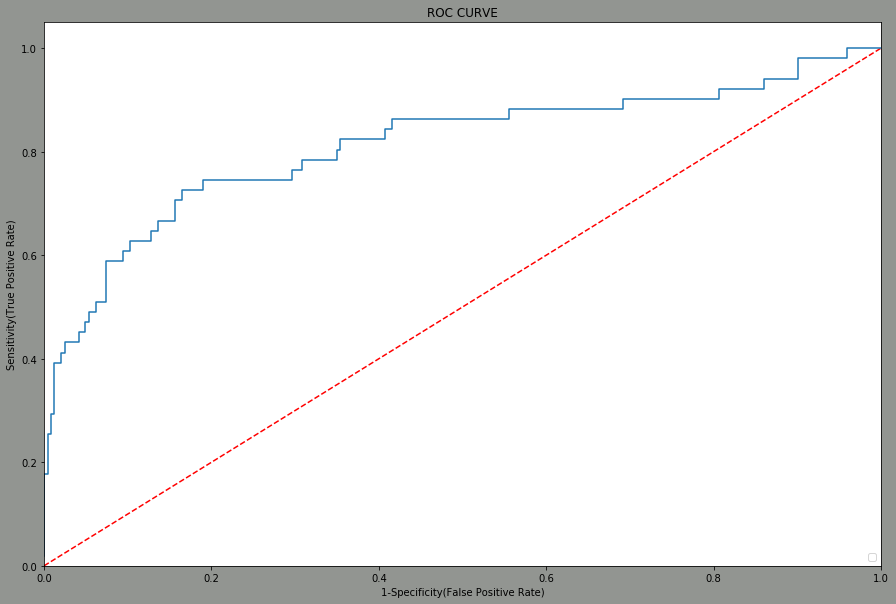

In [20]:
# Plotting Roc
roc_plot(y_test, y_prob)

In [21]:
# Getting Important Features
imp_ft = feature_importance(model, df, X)

Age                           0.110760
MonthlyIncome                 0.087104
DailyRate                     0.071556
DistanceFromHome              0.068564
MonthlyRate                   0.066299
HourlyRate                    0.061126
PercentSalaryHike             0.046278
NumCompaniesWorked            0.042979
TotalWorkingYears             0.037750
over_time_2                   0.037358
YearsSinceLastPromotion       0.034366
Env_satisfaction_3            0.033080
YearsAtCompany                0.032549
Department_new_2              0.024859
TrainingTimesLastYear         0.020748
travel_3                      0.020021
YearsWithCurrManager          0.019965
edu_field_4                   0.015379
mar_status_2                  0.014736
job_role_2                    0.013059
WorkLifeBalance_3             0.012835
job_involve_3                 0.011940
job_satisfaction_2            0.010850
edu_field_2                   0.010738
mar_status_3                  0.009032
job_role_7               

In [ ]:
name_model = "model_xgb.pkl"
pickling(model, name_model) # Name has to be provided manually
model_load(name_model)